In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('Global Terrorism.csv', encoding = 'latin-1')
df.head()

C:\Users\Tops\AppData\Local\Temp\ipykernel_12076\58711688.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Global Terrorism.csv', encoding = 'latin-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.columns


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.shape

(181691, 135)

In [6]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [7]:
#Choosing the important factors to go ahead with
terrorism = df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [8]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181256 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181053 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [9]:
# Checking the null values in data
terrorism.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

<Axes: >

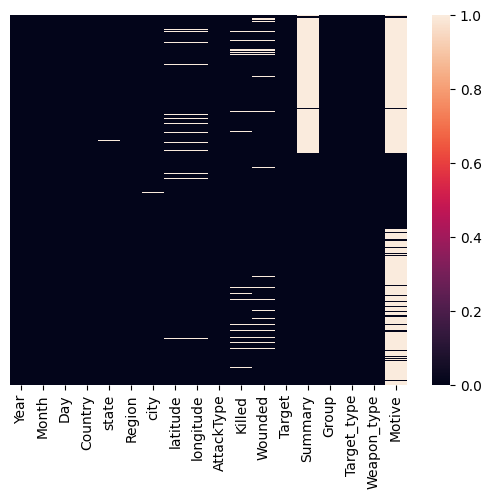

In [10]:
sns.heatmap(terrorism.isnull(), yticklabels = False)

In [11]:
Country_names = terrorism.Country.value_counts().index


In [12]:
Country_val = terrorism.Country.value_counts().values

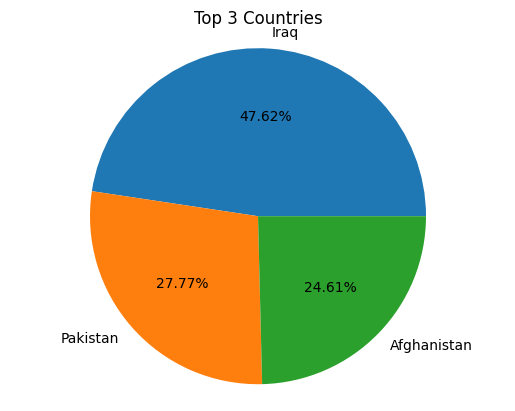

In [13]:
plt.pie(Country_val[:3], labels=Country_names[:3], autopct='%1.2f%%')
plt.axis('equal')  
plt.title('Top 3 Countries')
plt.show()

We get to know that the Country with the hightest number of attacks is 
1. Iran
2. Afghanisthan
3. Pakistan

In [14]:
City_names = terrorism.city.value_counts().index
City_val = terrorism.city.value_counts().values

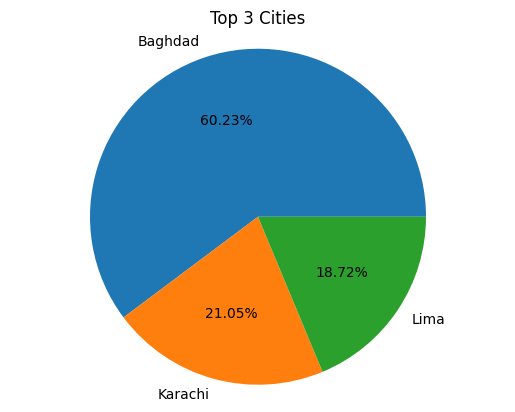

In [15]:
plt.pie(City_val[1:4], labels=City_names[1:4], autopct='%1.2f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 3 Cities')
plt.show()

We get to know that the Cities with the hightest number of attacks is

1. Baghdad
2. Karachi

In [16]:
print("City with the most attacks:",terrorism['city'].value_counts().index[1])

City with the most attacks: Baghdad


In [17]:
Region_names = terrorism.Region.value_counts().index
Region_val = terrorism.Region.value_counts().values

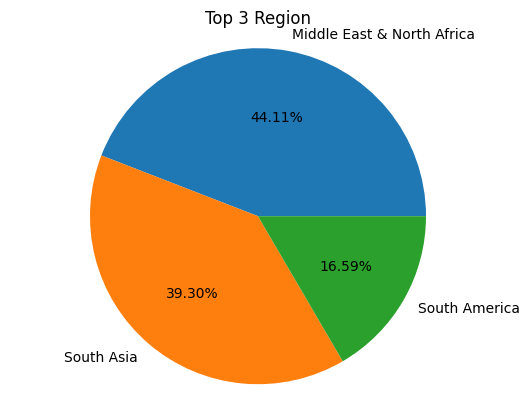

In [18]:
plt.pie(Region_val[:3], labels=Region_names[:3], autopct='%1.2f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 3 Region')
plt.show()

We get to know that the Regions with the hightest number of attacks is

1. Middle East & North Africa
2. South Asia
3. South America


In [19]:
Year_names = terrorism.Year.value_counts().index
Year_val = terrorism.Year.value_counts().values

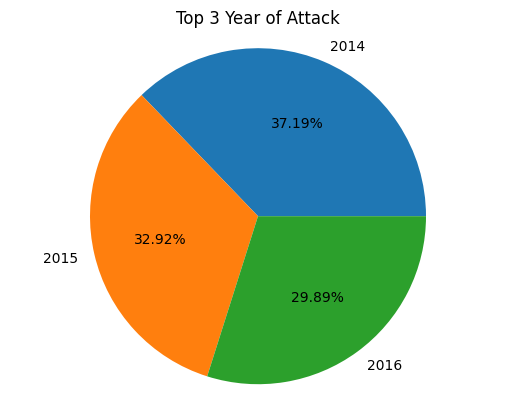

In [20]:
plt.pie(Year_val[:3], labels=Year_names[:3], autopct='%1.2f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 3 Year of Attack')
plt.show()

We get to know that the Year with the hightest number of attacks is

1. 2014
2. 2015
3. 2016

In [21]:
Month_names = terrorism.Month.value_counts().index
Month_val = terrorism.Month.value_counts().values

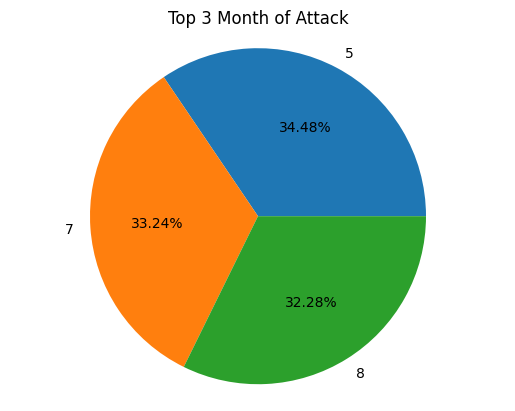

In [22]:
plt.pie(Month_val[:3], labels=Month_names[:3], autopct='%1.2f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 3 Month of Attack')
plt.show()

We get to know that the Month with the hightest number of attacks is

1. 5 --> May
2. 7 --> July
3. 8 --> August

In [23]:
Group_names = terrorism.Group.value_counts().index
Group_val = terrorism.Group.value_counts().values

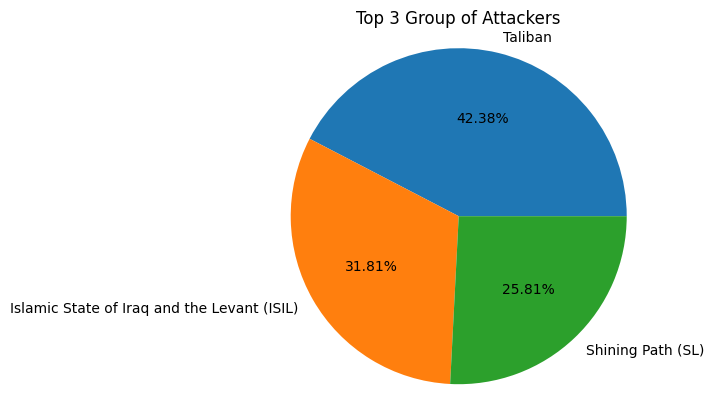

In [24]:
plt.pie(Group_val[1:4], labels=Group_names[1:4], autopct='%1.2f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 3 Group of Attackers')
plt.show()

We get to know that the Group with most attacks is

1. Taliban
2. Islamic State of Iraq abd the Levant

In [25]:
Attacks_types = terrorism.AttackType.value_counts().index
Atttack_types_num = terrorism.AttackType.value_counts().values

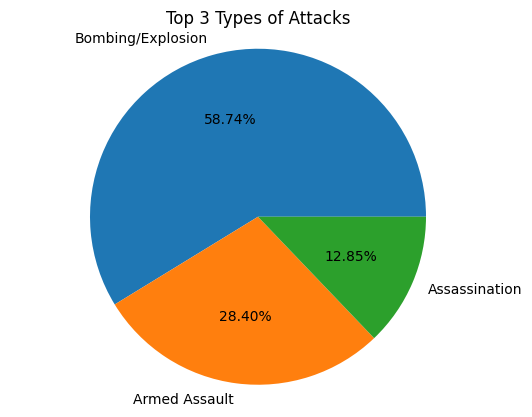

In [26]:
plt.pie(Atttack_types_num[:3], labels=Attacks_types[:3], autopct='%1.2f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 3 Types of Attacks')
plt.show()

We get to know that the Most Types of Attacks are

1. Bombing/Explosion
2. Armed Assault
3. Assassination

# Visualizing the data

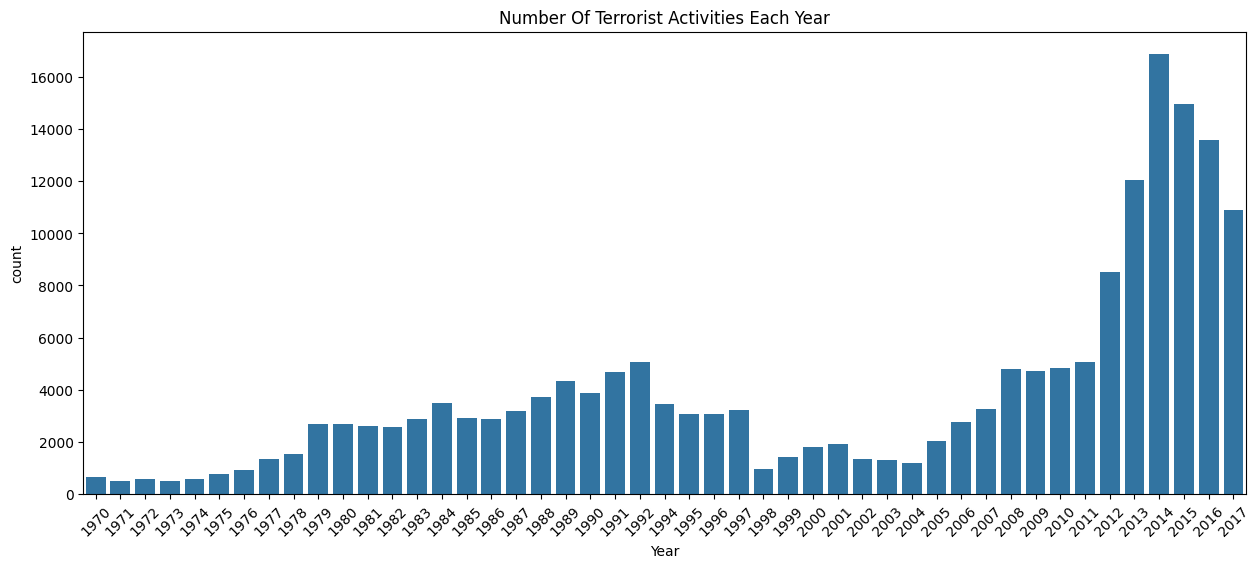

In [27]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Year', data=terrorism)
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

<Axes: xlabel='Year'>

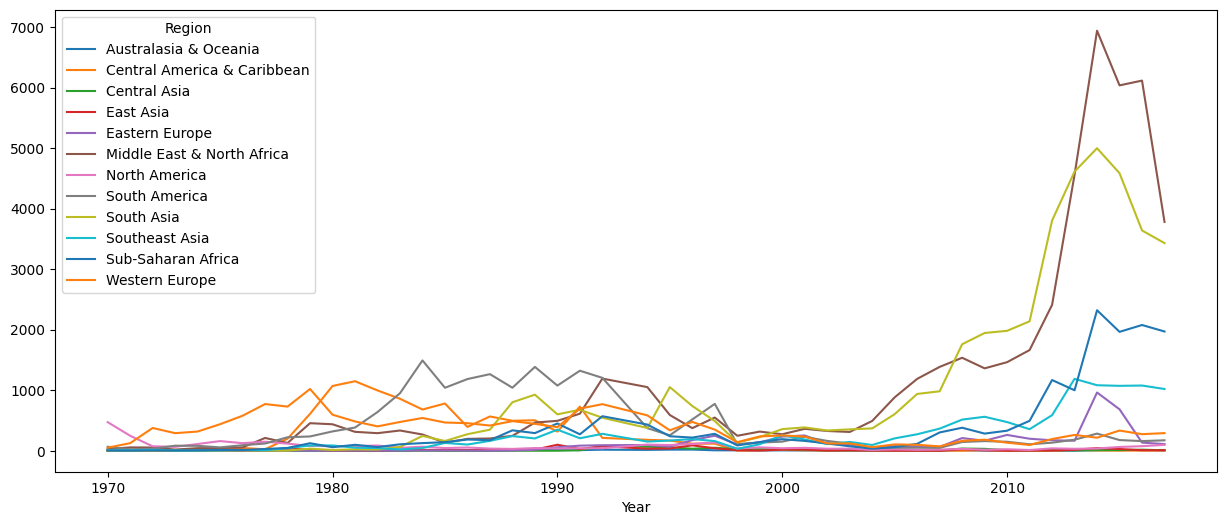

In [63]:
pd.crosstab(terrorism.Year, terrorism.Region).plot(kind='line',figsize=(15,6))
# plt.title('Terrorist Activities by Region in each Year')
# plt.ylabel('Number of Attacks')
# plt.show()

From this graph we can say that
1. Number of attacks in Middle East & North Africa and South Asia increased after year 2010
2. Number of attacks in Central America & Carribbean and South America decreased after 1990
3. Eastern 

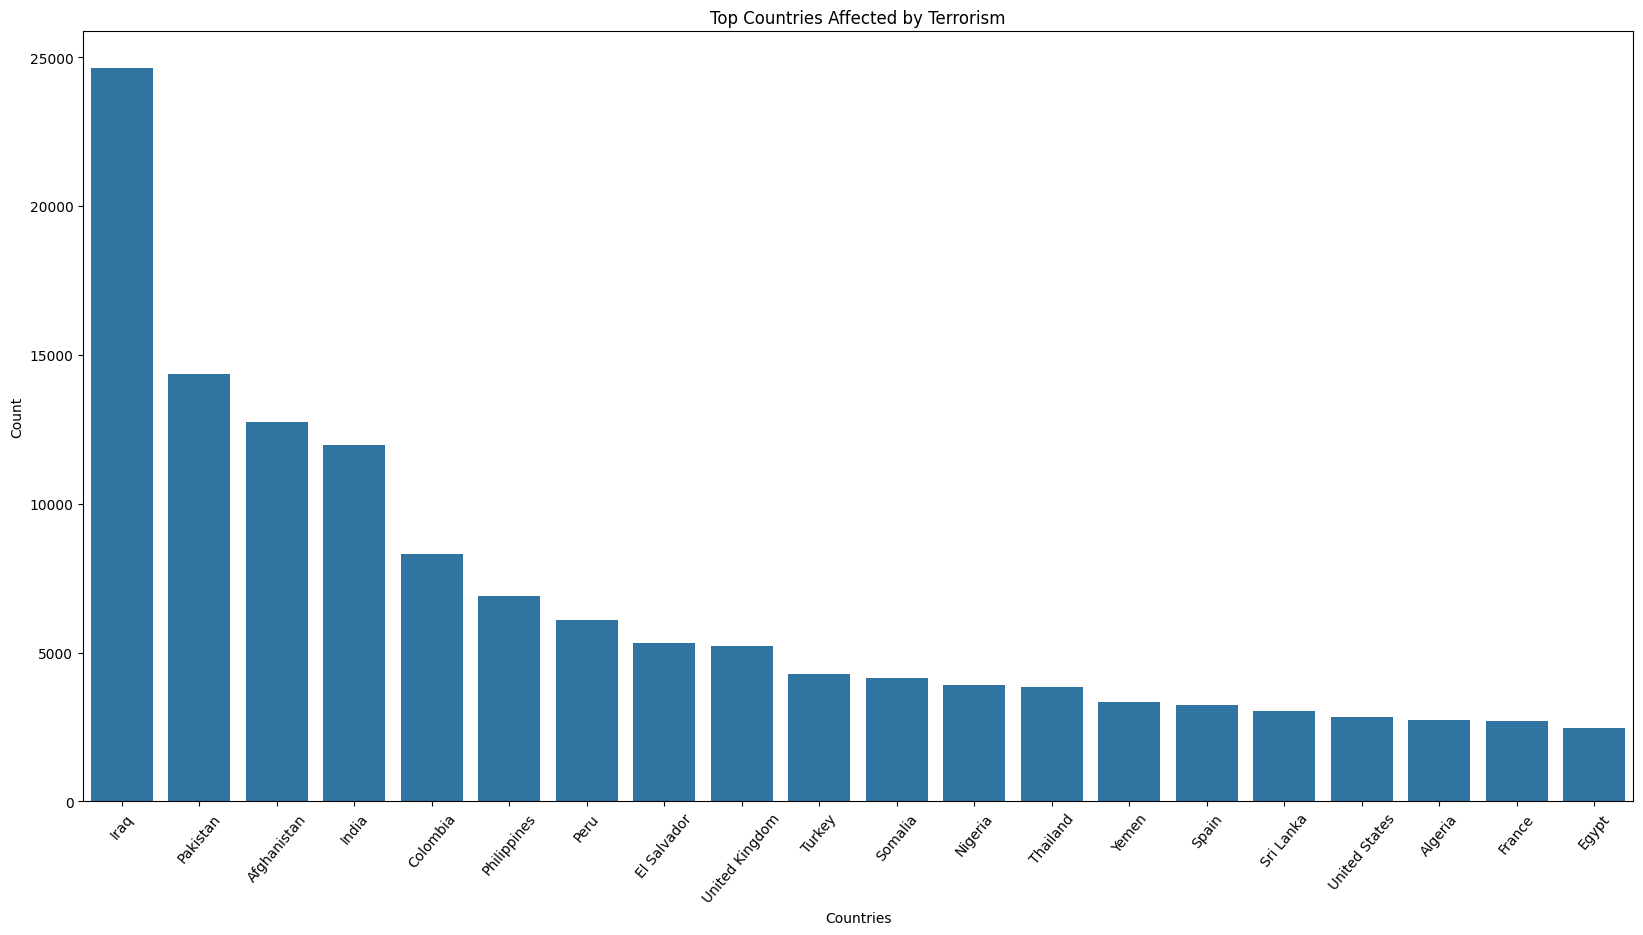

In [29]:
plt.figure(figsize=(20, 10))  # Set the figure size
sns.barplot(x=terrorism['Country'].value_counts()[:20].index, y=terrorism['Country'].value_counts()[:20].values)
plt.title('Top Countries Affected by Terrorism')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

Top 5 countries affected by terrorism are
1. Iran
2. Pakistan
3. Afghanistan
4. India
5. Columbia

In [30]:
KillData = terrorism.loc[:, 'Killed']
KillData = KillData.dropna()
Total_Kill = int(sum(KillData))
print(Total_Kill)

411868


Total number of people killed by Terror Attack are 411868

In [31]:
grouped_data = terrorism.groupby('AttackType')['Killed'].sum().reset_index()

typeKillFormatData = grouped_data.pivot_table( columns='AttackType', values='Killed', aggfunc = 'sum')

typeKillFormatData


AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [32]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


<function matplotlib.pyplot.show(close=None, block=None)>

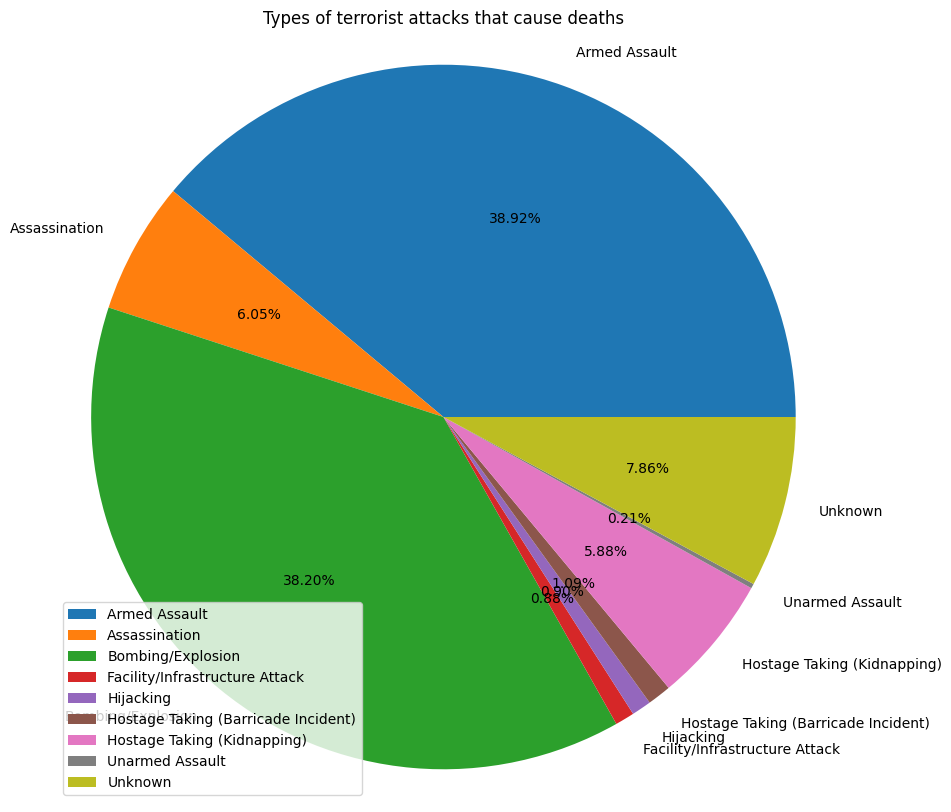

In [33]:
sum_killed = typeKillFormatData.sum()

# Get labels and values for the pie chart
labels = sum_killed.index.tolist()
values = sum_killed.values.tolist()

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(values, labels=labels, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend()  # Location of the legend
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show

In [34]:
38.20 + 38.92


77.12

Upto 77% of the deaths are result of Armed assault and bombing/explosion

In [35]:
yr_kill = terrorism[['Year','Killed']].groupby("Year").sum().reset_index()
yr_kill.head()


,Year,Killed
0,1970,174.0
1,1971,173.0
2,1972,566.0
3,1973,370.0
4,1974,539.0


In [36]:
max_killed_year = yr_kill.loc[yr_kill['Killed'].idxmax()]
max_killed_year

Year       2014.0
Killed    44490.0
Name: 43, dtype: float64

In [37]:
yr_wounded = terrorism[['Year','Wounded']].groupby("Year").sum().reset_index()
yr_wounded.head()

,Year,Wounded
0,1970,212.0
1,1971,82.0
2,1972,409.0
3,1973,495.0
4,1974,865.0


In [38]:
max_wounded_year = yr_wounded.loc[yr_wounded['Wounded'].idxmax()]
max_wounded_year

Year        2015.0
Wounded    44043.0
Name: 44, dtype: float64

C:\Users\Tops\AppData\Local\Temp\ipykernel_12076\2387202759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Killed', data=yr_kill, palette='viridis')


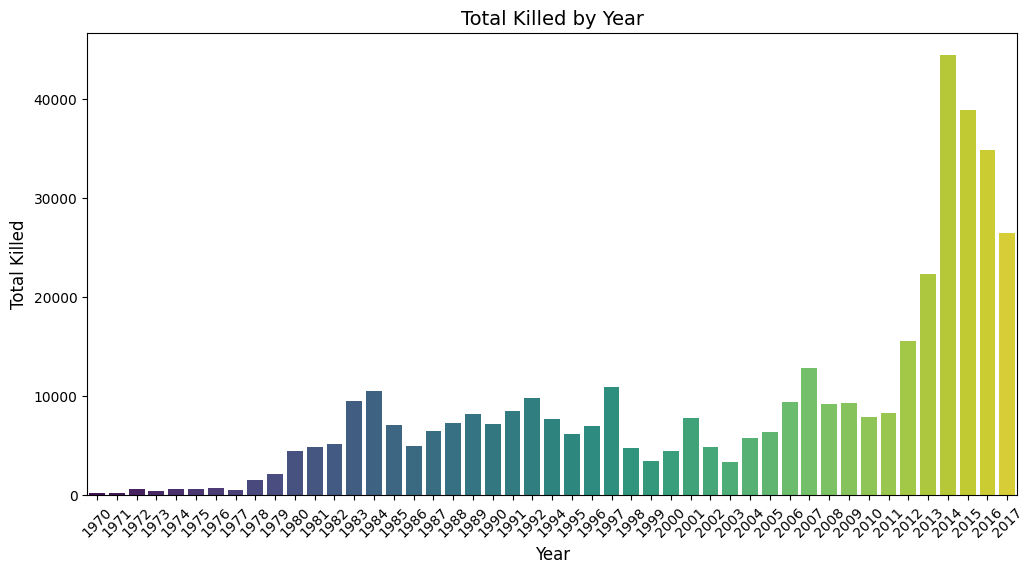

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Killed', data=yr_kill, palette='viridis')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Killed', fontsize=12)
plt.title('Total Killed by Year', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Maximum Kill were occureed in 2014 and Minimin in 1971

C:\Users\Tops\AppData\Local\Temp\ipykernel_12076\2101763073.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Wounded', data=yr_wounded, palette='viridis')


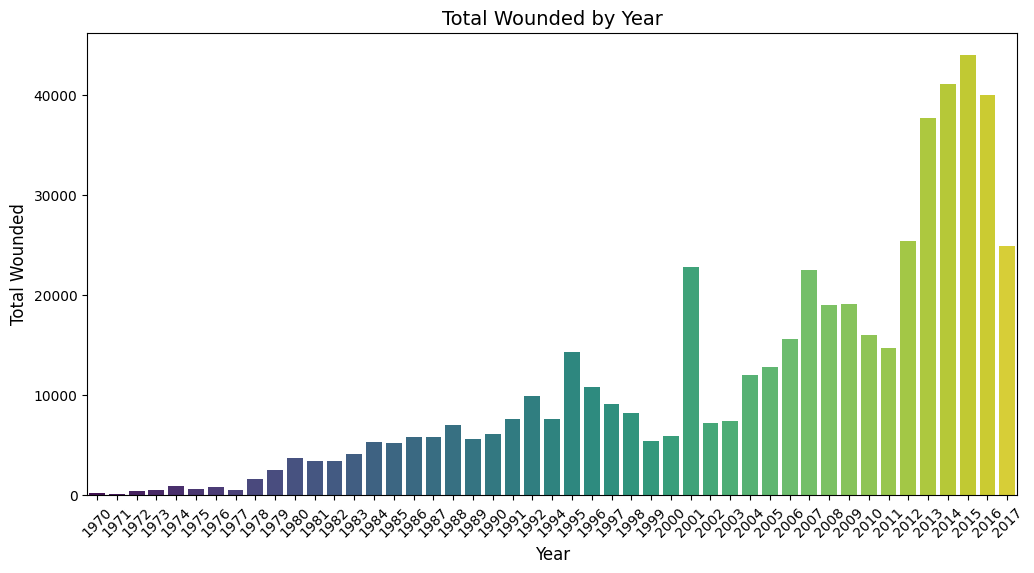

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Wounded', data=yr_wounded, palette='viridis')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Wounded', fontsize=12)
plt.title('Total Wounded by Year', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Maximum Wounded were occureed in 2015 and Minimin in 1971

## Observation
### Year wise Attacks

   #### (i) Attack
  
(a) Most number of attacks were in 2014 
    
(b) Least number of attacks were in 1971
  
   #### (ii) Killed
  
(a) Most number of people killed were 44490 in 2014
    
(b) Least number of people killed were 173 in 1971
    
   #### (iii) Wounded
  
(a) Most number of people wounded were 44043 in 2015
    
(b) Least number of people wounded were 82 in 1971

In [41]:
region = pd.crosstab(terrorism.Year, terrorism.Region)
region

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


In [42]:
region_wounded = terrorism[['Region','Wounded']].groupby("Region").sum().reset_index()
region_wounded

,Region,Wounded
0,Australasia & Oceania,260.0
1,Central America & Caribbean,8991.0
2,Central Asia,2009.0
3,East Asia,9213.0
4,Eastern Europe,12045.0
5,Middle East & North Africa,214308.0
6,North America,21531.0
7,South America,16704.0
8,South Asia,141360.0
9,Southeast Asia,26259.0


In [43]:
region_kill = terrorism[['Region','Killed']].groupby("Region").sum().reset_index()
region_kill

,Region,Killed
0,Australasia & Oceania,150.0
1,Central America & Caribbean,28708.0
2,Central Asia,1000.0
3,East Asia,1152.0
4,Eastern Europe,7415.0
5,Middle East & North Africa,137642.0
6,North America,4916.0
7,South America,28849.0
8,South Asia,101319.0
9,Southeast Asia,15637.0




## Observation
### Region wise Attacks

   #### (i) Attack
  
(a) Most number of attacks were in "Middle East & North Africa" 
    
(b) Least number of attacks were in "Australia & Oceania"
  
   #### (ii) Killed
  
(a) Most number of people killed were 137642 in "Middle East & North Africa" 
    
(b) Least number of people killed were 410 in "Australia & Oceania"
    
   #### (iii) Wounded
  
(a) Most number of people wounded were 214308 in "Middle East & North Africa"
    
(b) Least number of people wounded were 260 in "Australia & Oceania"

In [44]:
Country_attack = terrorism['Country'].value_counts().head(10)
Country_attack

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64

C:\Users\Tops\AppData\Local\Temp\ipykernel_12076\4112164672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Country_attack.index, y=Country_attack.values, palette='viridis')


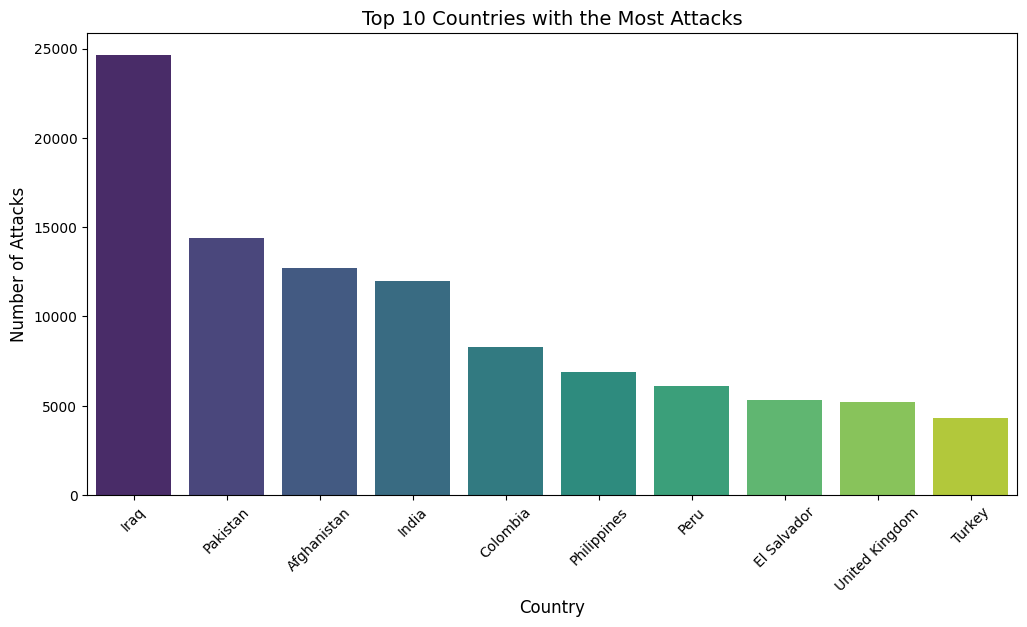

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x=Country_attack.index, y=Country_attack.values, palette='viridis')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 Countries with the Most Attacks', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [46]:
Country_kill = terrorism[['Country','Killed']].groupby("Country").sum().sort_values(by = "Killed", ascending = False)
Country_kill.head(10)



,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


C:\Users\Tops\AppData\Local\Temp\ipykernel_12076\1954629023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Country_kill.index[:10], y=Country_kill['Killed'][:10], palette='viridis')


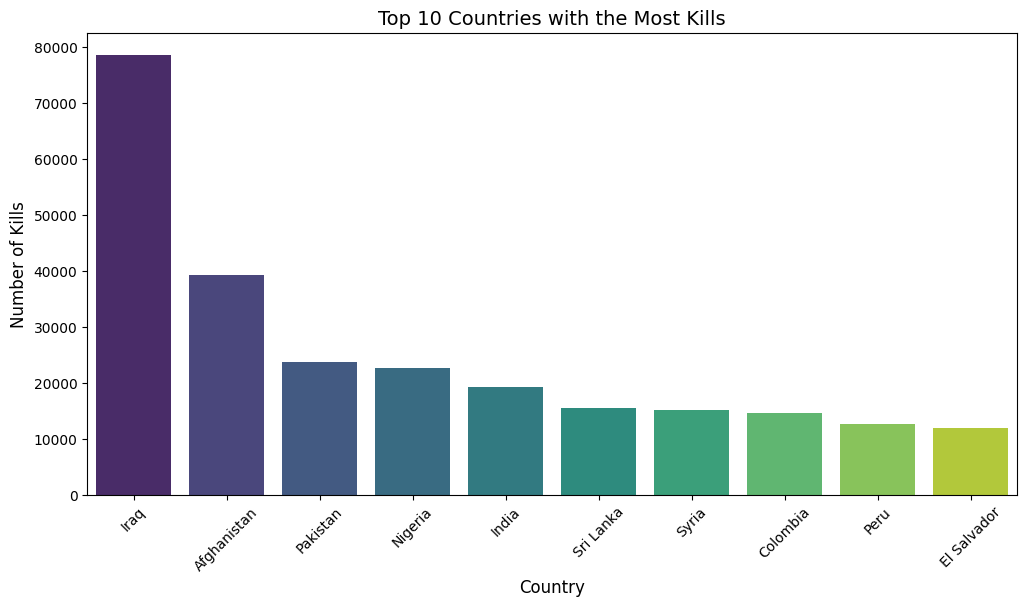

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x=Country_kill.index[:10], y=Country_kill['Killed'][:10], palette='viridis')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Kills', fontsize=12)
plt.title('Top 10 Countries with the Most Kills', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [48]:
Country_wounded = terrorism[['Country','Wounded']].groupby("Country").sum().sort_values(by = "Wounded", ascending = False)
Country_wounded.head(10)



,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


C:\Users\Tops\AppData\Local\Temp\ipykernel_12076\3304912403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Country_wounded.index[:10], y=Country_wounded['Wounded'][:10], palette='viridis')


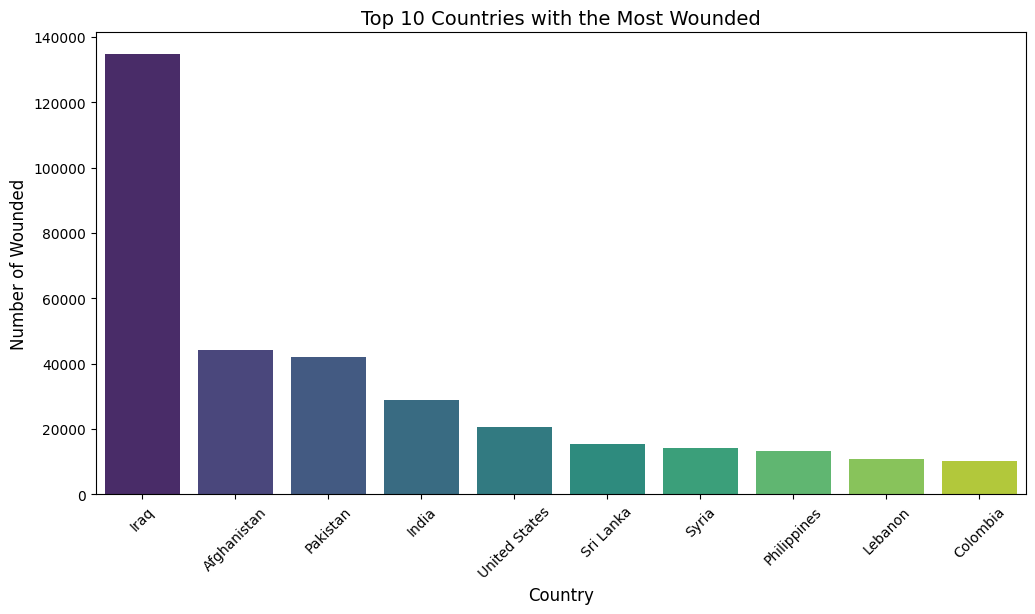

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x=Country_wounded.index[:10], y=Country_wounded['Wounded'][:10], palette='viridis')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Wounded', fontsize=12)
plt.title('Top 10 Countries with the Most Wounded', fontsize=14)
plt.xticks(rotation=45)
plt.show()



## Observation
### Countries wise Attacks

   #### (i) Attack
  
(a) Most number of attacks were 24636 in "Iraq" 
    
(b) Least number of attacks were  4292 in "Turkey"
  
   #### (ii) Killed
  
(a) Most number of people killed were 78589  in "Iraq" 
    
(b) Least number of people killed were 12053  in "El Salvador"
    
   #### (iii) Wounded
  
(a) Most number of people wounded were 134690  in "Iraq"
    
(b) Least number of people wounded were 10328  in " Colombia"

In [50]:
City_attack = terrorism['city'].value_counts()[1:11]
City_attack

city
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: count, dtype: int64

C:\Users\Tops\AppData\Local\Temp\ipykernel_12076\3603354678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=City_attack.index, y=City_attack.values, palette='viridis')


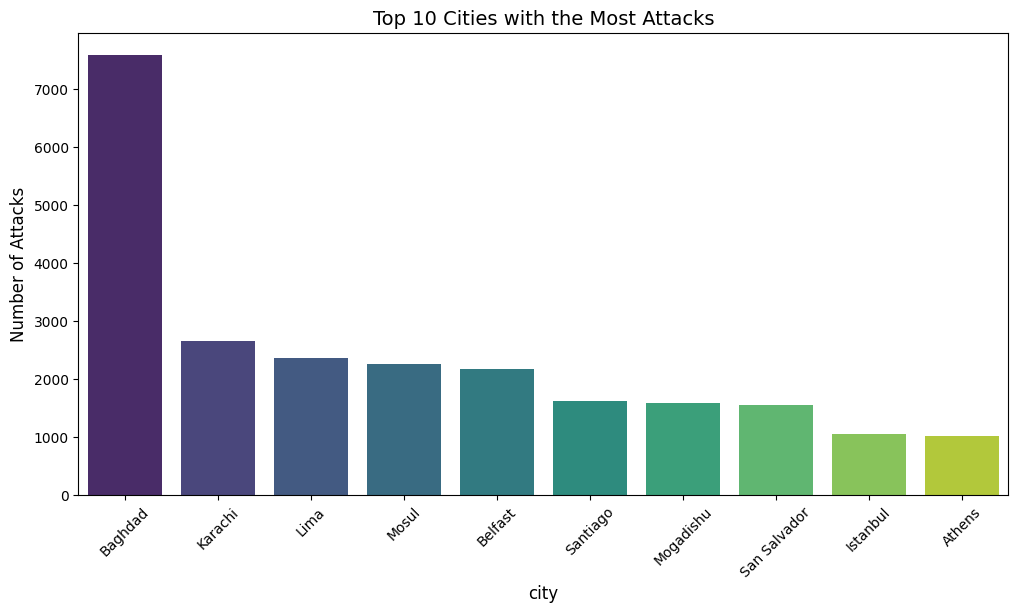

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x=City_attack.index, y=City_attack.values, palette='viridis')
plt.xlabel('city', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 Cities with the Most Attacks', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [52]:
City_wounded = terrorism[['city','Wounded']].groupby("city").sum().sort_values(by = "Wounded", ascending = False)
City_wounded.head(10)



,Wounded
city,
Baghdad,56725.0
New York City,16781.0
Unknown,12803.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0


C:\Users\Tops\AppData\Local\Temp\ipykernel_12076\3852563562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=City_wounded.index[:10], y=Country_wounded['Wounded'][:10], palette='viridis')


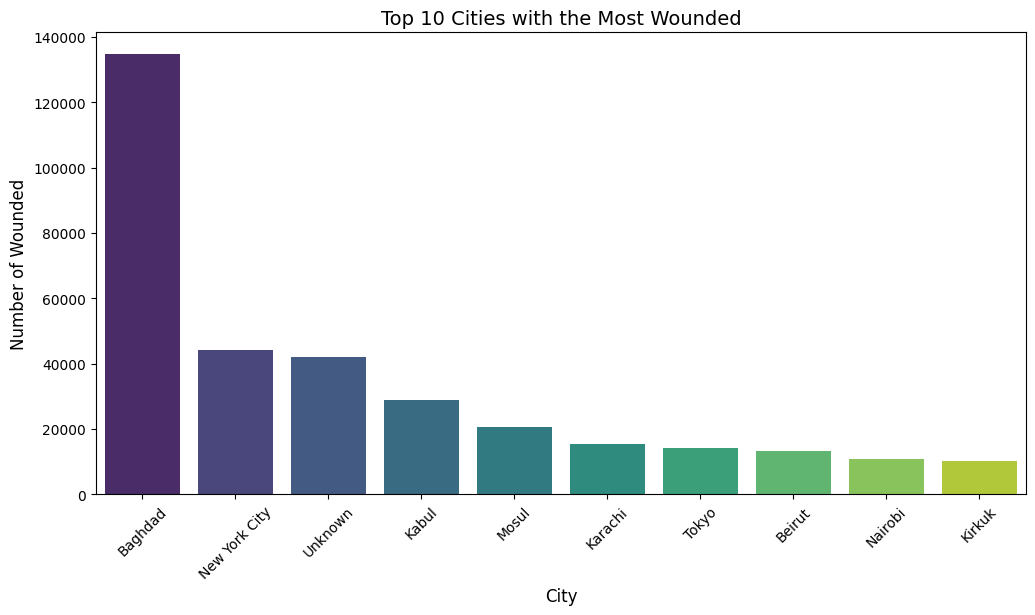

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x=City_wounded.index[:10], y=Country_wounded['Wounded'][:10], palette='viridis')
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Wounded', fontsize=12)
plt.title('Top 10 Cities with the Most Wounded', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [54]:
City_killed = terrorism[['city','Killed']].groupby("city").sum().sort_values(by = "Killed", ascending = False)
City_wounded.head(10)



,Wounded
city,
Baghdad,56725.0
New York City,16781.0
Unknown,12803.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0


C:\Users\Tops\AppData\Local\Temp\ipykernel_12076\3971031544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=City_killed.index[:10], y=City_killed['Killed'][1:11], palette='viridis')


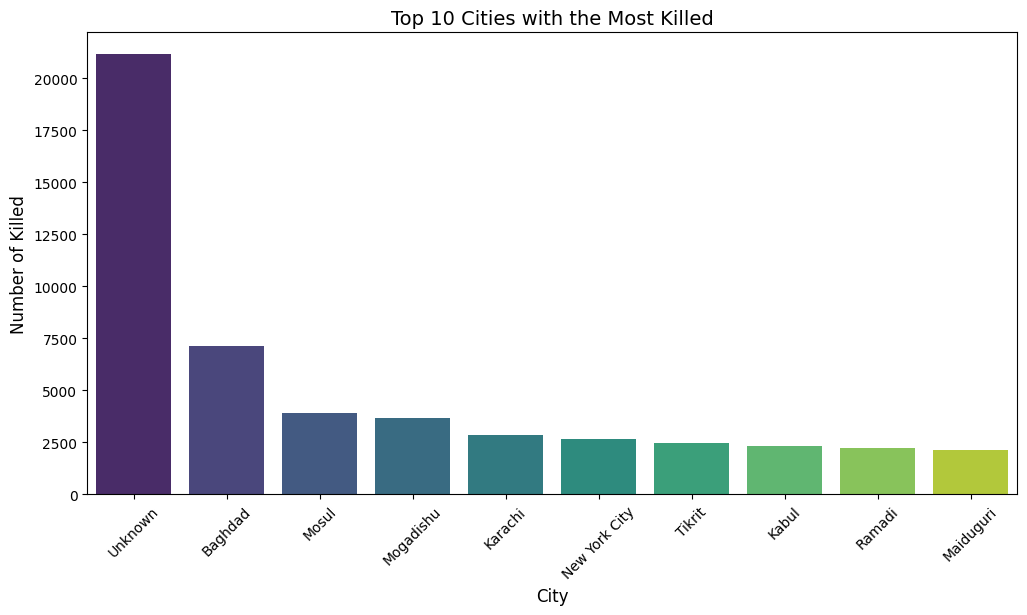

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(x=City_killed.index[:10], y=City_killed['Killed'][1:11], palette='viridis')
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Killed', fontsize=12)
plt.title('Top 10 Cities with the Most Killed', fontsize=14)
plt.xticks(rotation=45)
plt.show()



## Observation
### Cities wise Attacks

   #### (i) Attack
  
(a) Most number of attacks were 7589  in "Baghdad" 
    
(b) Least number of attacks were  1019 in "Athens"
  
   #### (ii) Killed
  
(a) Most number of people killed were 21151  in "Baghdad" 
    
(b) Least number of people killed were 2125  in "Aleppo"
    
   #### (iii) Wounded
  
(a) Most number of people wounded were 56725  in "Baghdad"
    
(b) Least number of people wounded were 4955  in " Mogadishu"

In [56]:
group_attack = terrorism['Group'].value_counts()[1:11]
group_attack

Group
Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: count, dtype: int64

C:\Users\Tops\AppData\Local\Temp\ipykernel_12076\876773921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_attack.index, y=group_attack.values, palette='viridis')


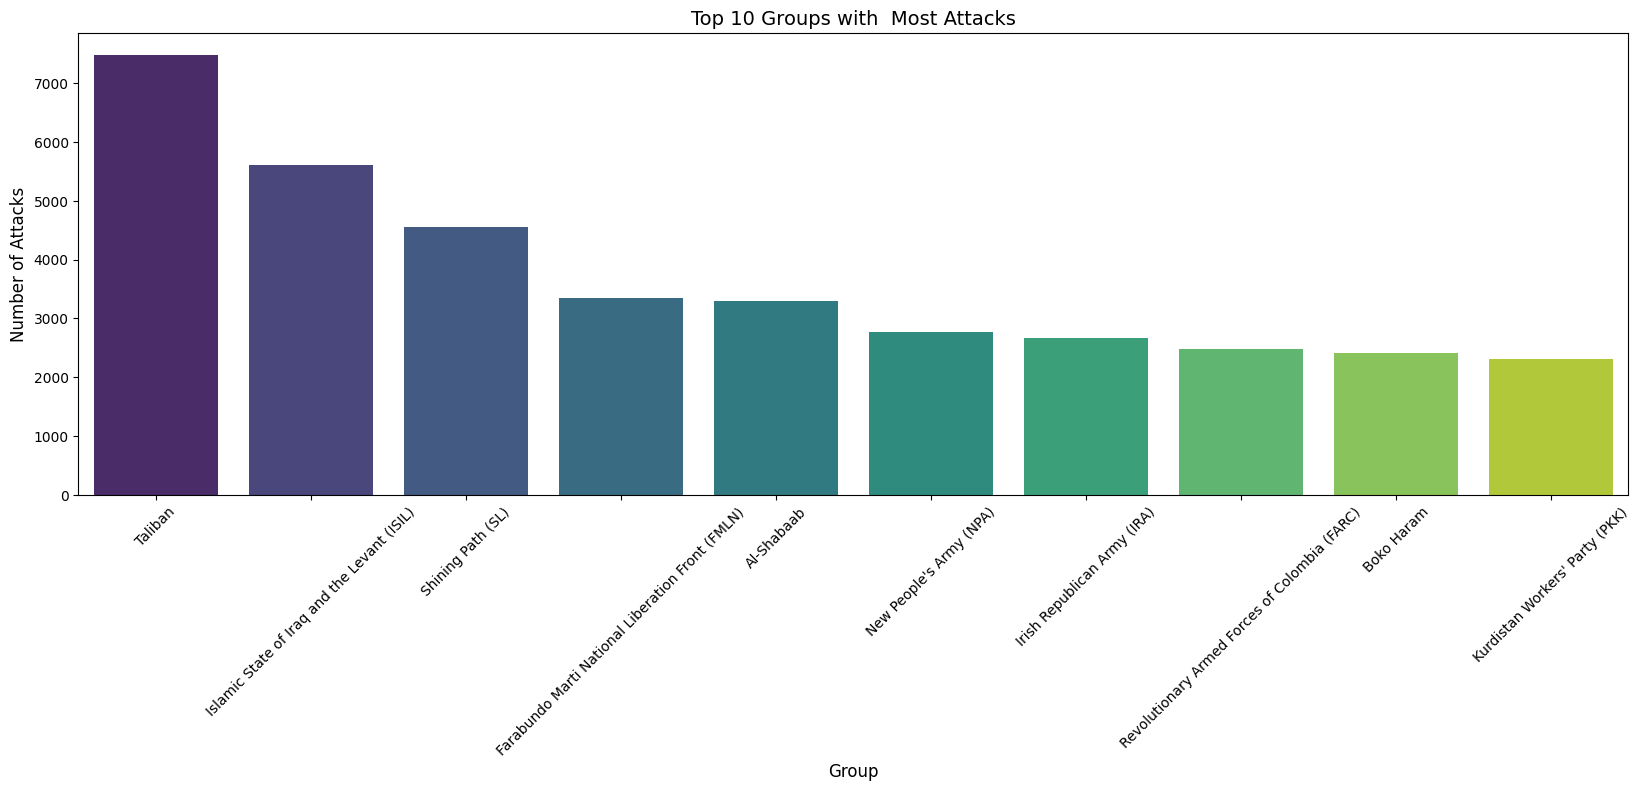

In [57]:
plt.figure(figsize=(20, 6))
sns.barplot(x=group_attack.index, y=group_attack.values, palette='viridis')
plt.xlabel('Group', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 Groups with  Most Attacks', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [58]:
group_wounded = terrorism[['Group','Wounded']].groupby("Group").sum().sort_values(by = "Wounded", ascending = False).drop("Unknown")
group_wounded.head(10)



,Wounded
Group,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0
Aum Shinri Kyo,6003.0


C:\Users\Tops\AppData\Local\Temp\ipykernel_12076\1698178893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_wounded.index[:10], y=group_wounded['Wounded'][:10], palette='viridis')


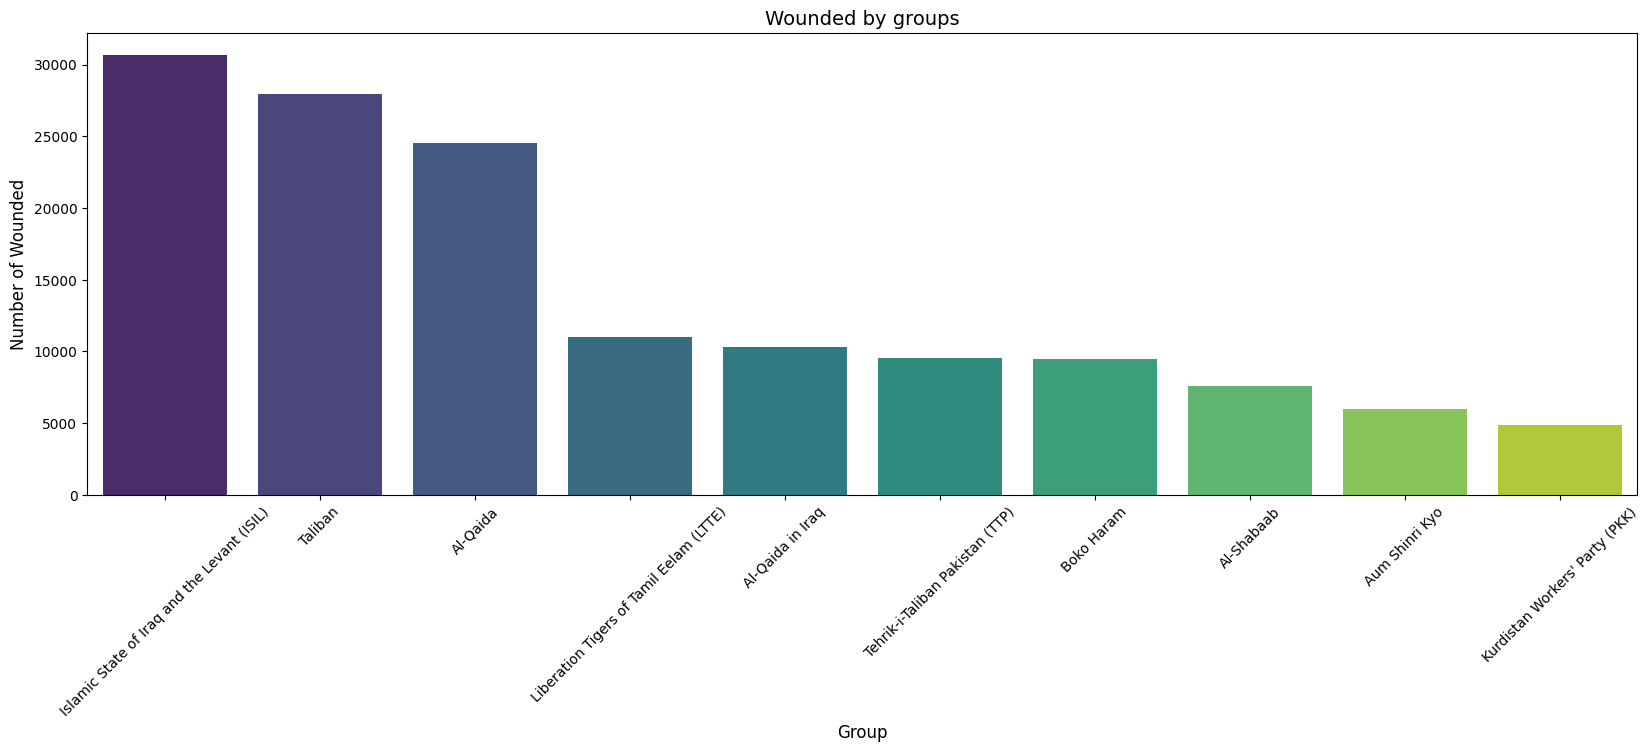

In [59]:
plt.figure(figsize=(20,6))
sns.barplot(x=group_wounded.index[:10], y=group_wounded['Wounded'][:10], palette='viridis')
plt.xlabel('Group', fontsize=12)
plt.ylabel('Number of Wounded', fontsize=12)
plt.title('Wounded by groups', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [60]:
group_killed = terrorism[['Group','Killed']].groupby("Group").sum().sort_values(by = "Killed", ascending = False).drop("Unknown")
group_killed.head(10)



,Killed
Group,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6042.0


C:\Users\Tops\AppData\Local\Temp\ipykernel_12076\4150614342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_killed.index[:10], y=group_killed['Killed'][:10], palette='viridis')


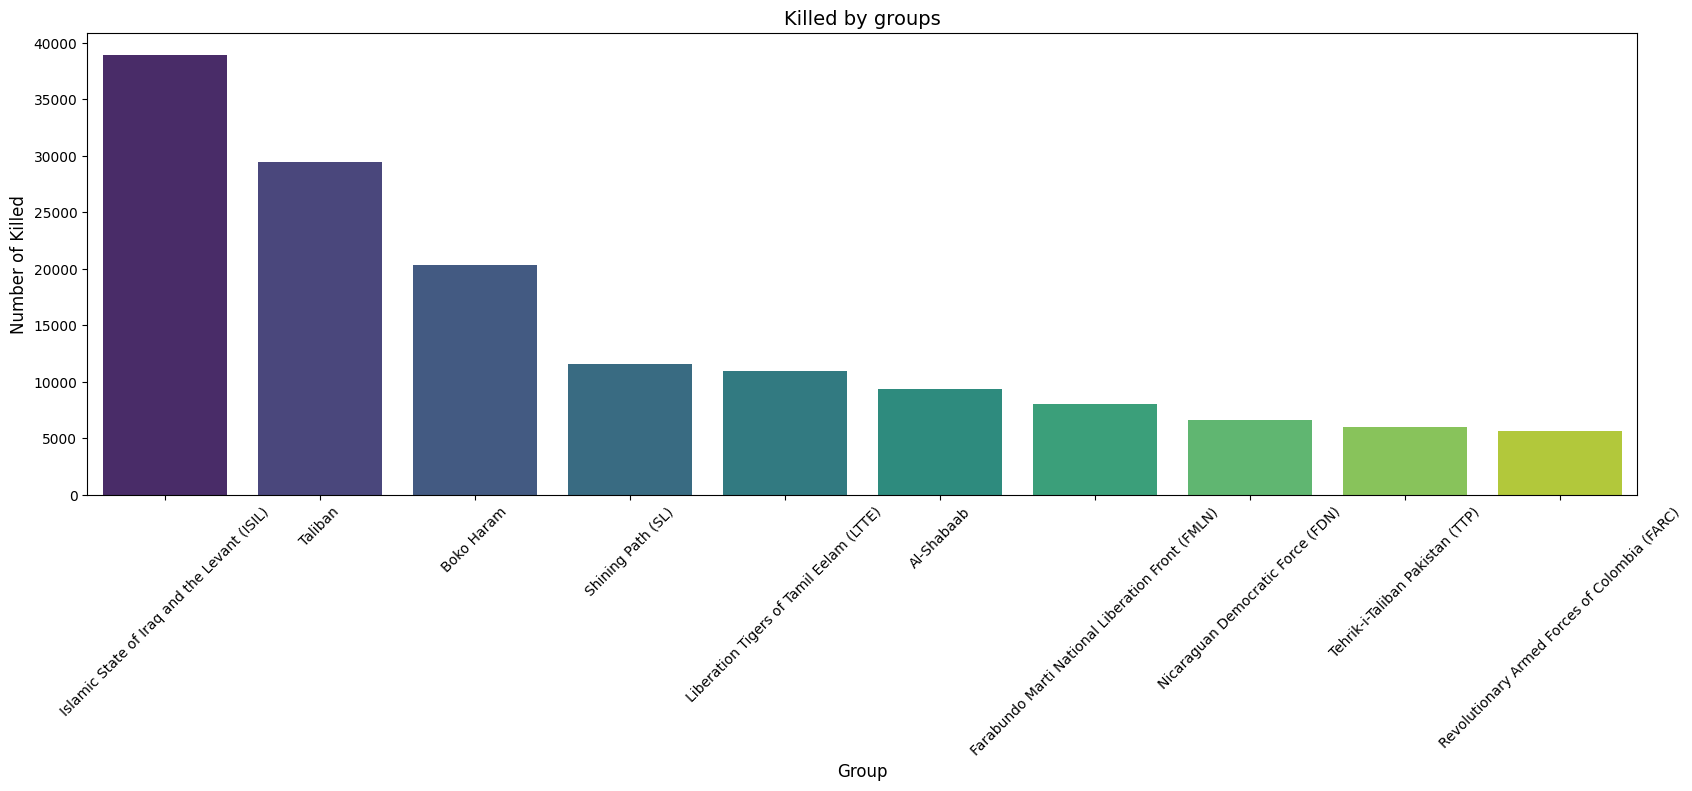

In [61]:
plt.figure(figsize=(20,6))
sns.barplot(x=group_killed.index[:10], y=group_killed['Killed'][:10], palette='viridis')
plt.xlabel('Group', fontsize=12)
plt.ylabel('Number of Killed', fontsize=12)
plt.title('Killed by groups', fontsize=14)
plt.xticks(rotation=45)
plt.show()


## Observation
### Groups wise Attacks

   #### (i) Attack
  
(a) Most number of attacks were 7478  in "Taliban" 
    
(b) Least number of attacks were 2310  in "Kurdistan Workers' Party (PKK)"
  
   #### (ii) Killed
  
(a) Most number of people killed were 38923  in "Islamic State of Iraq and the Levant (ISIL)" 
    
(b) Least number of people killed were 5661   in "Revolutionary Armed Forces of Colombia (FARC)"
    
   #### (iii) Wounded
  
(a) Most number of people wounded were 30672   in "Islamic State of Iraq and the Levant (ISIL)" 
    
(b) Least number of people wounded were 4908   in  "Kurdistan Workers' Party (PKK)""